# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Проведем анализ рыночной стоимости объектов недвижимости(квартир). 

Проанализируем ключевые характеристики квартир, выявим пропуски в датафрейме и устраним их, выявим аномалии в данных и исправим их или удалим их.

В ходе анализа добавим дополнительные столбцы в датафрейм, с помощью которых дополнительно сможем исследовать данные.

Инструменты, которые буду использовать в своем исследовании:
-гистограмма,
-срезы,
-сводные таблицы,
-метод корреляции,
-функции

Основной целью анализа является выявление факторов влияющих на стоимость квартир. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.info()  
#всего 23699 объявления,больше всего пропусков в ceiling_height, is_apartment, balcony, 
#airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_nearest

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.head(20) #посмотрим первые 20 строк таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<b> Проблемы данных:</b> 
<br> 1) first_day_exposition - object необходимо перевести в datetime.
<br> 2) Пропуски NaN в ceiling_height возможно заменить на медианную, так как часто квартиры имеют однотипные технические характеристики и высота потолков составляет 2,7 м. - Заполню медианными значениями.
<br> 3) floors_total - заменю данные на тип int
<br> 4) Есть пропуски в жилой площади и площади кухни, скорее всего лучше удалить подобные квартиры, так как жилая площадь может сильно отличаться, в зависимости от общей площади, планировки квартиры(могут быть студии, поэтому кухня отдельно не выделяется). Можно попробовать заменить пропуски медианными значениями по аналогичным квартирам. 
<br> 5) Пропуски в апартаментах скорее всего из-за того, что это квартиры и люди просто не указывали это. Логично будет заменить данные на булевы значения True, False.
<br> 6) Пропуски в балконах - скроее всего балкона в квартире нет. Пропуски зменим на 0, данные заменим на int.

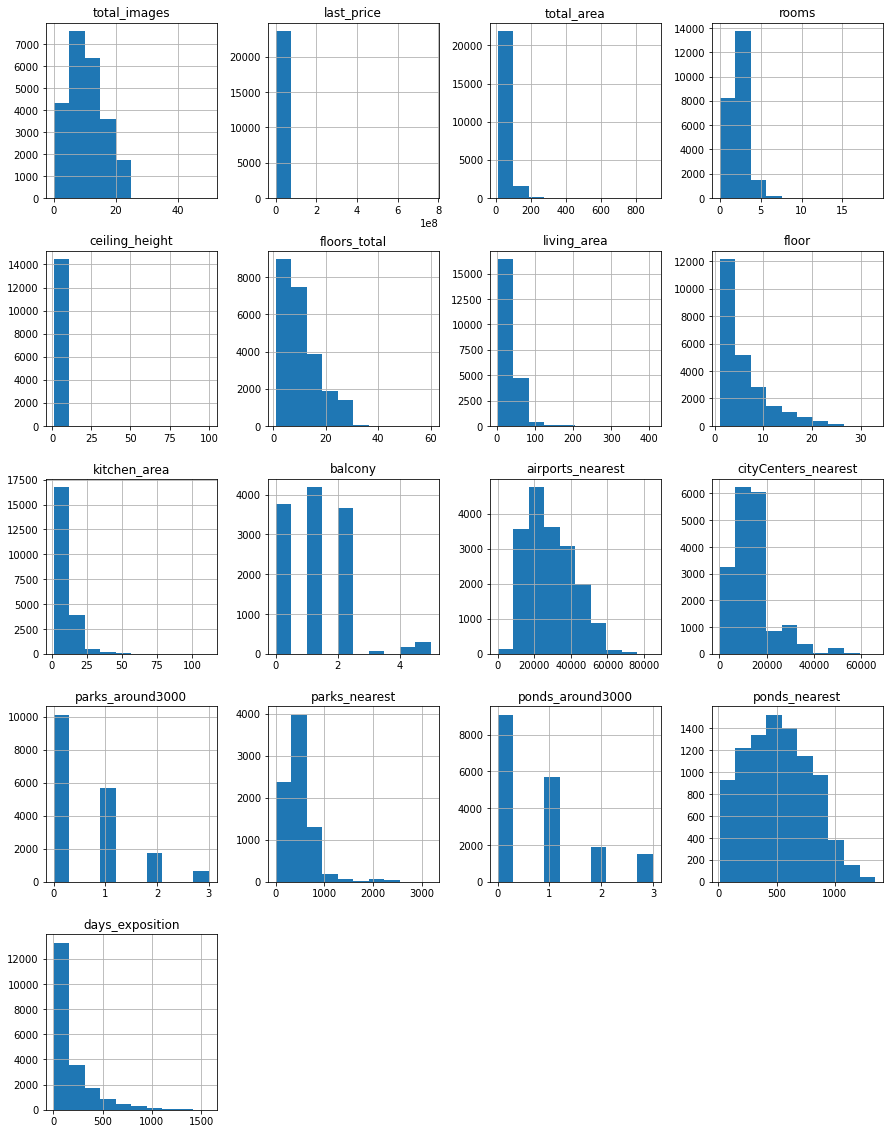

In [5]:
data.hist(figsize=(15, 20));

Больше всего вопросов вызывает график к столбцу cityCenters_nearest, так как мы имеем в таблице много разных населенных пунктов, то здесь возможно имеется ввиду расстояние до центра СПб.

### Предобработка данных

# ceiling_height

In [6]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
# пропуски для высоты потолков заменил медианным значением
print(data.ceiling_height.head())

0    2.70
1    2.65
2    2.65
3    2.65
4    3.03
Name: ceiling_height, dtype: float64


In [7]:
data.info()  # проверим данные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

# last_price

In [8]:
min_values = data['last_price'].nsmallest(10)
max_values = data['last_price'].nlargest(10)
print(min_values)
print(max_values)

8793      12190.0
14911    430000.0
17456    430000.0
16274    440000.0
5698     450000.0
9581     450000.0
16219    450000.0
17676    450000.0
18867    470000.0
21912    470000.0
Name: last_price, dtype: float64
12971    763000000.0
19540    420000000.0
14706    401300000.0
1436     330000000.0
15651    300000000.0
22831    289238400.0
16461    245000000.0
13749    240000000.0
5893     230000000.0
8900     190870000.0
Name: last_price, dtype: float64


In [9]:
data.loc[8793] #ошибка в цене, так как площадь 109 кв.м в СПб, скорее всего забыли 000

total_images                              7
last_price                          12190.0
total_area                            109.0
first_day_exposition    2019-03-20T00:00:00
rooms                                     2
ceiling_height                         2.75
floors_total                           25.0
living_area                            32.0
floor                                    25
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                           40.5
balcony                                 NaN
locality_name               Санкт-Петербург
airports_nearest                    36421.0
cityCenters_nearest                  9176.0
parks_around3000                        1.0
parks_nearest                         805.0
ponds_around3000                        0.0
ponds_nearest                           NaN
days_exposition                         8.0
Name: 8793, dtype: object

In [10]:
median_price_8793 = data['last_price'].median()
data.loc[8793] = data.loc[8793].replace(12190.0, 12190000.0)
data.loc[8793]

total_images                              7
last_price                       12190000.0
total_area                            109.0
first_day_exposition    2019-03-20T00:00:00
rooms                                     2
ceiling_height                         2.75
floors_total                           25.0
living_area                            32.0
floor                                    25
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                           40.5
balcony                                 NaN
locality_name               Санкт-Петербург
airports_nearest                    36421.0
cityCenters_nearest                  9176.0
parks_around3000                        1.0
parks_nearest                         805.0
ponds_around3000                        0.0
ponds_nearest                           NaN
days_exposition                         8.0
Name: 8793, dtype: object

In [11]:
data.loc[12971] #вполне может быть из-за площади квартиры, но далеко от центра, может быть другой престижный район

total_images                             19
last_price                      763000000.0
total_area                            400.0
first_day_exposition    2017-09-30T00:00:00
rooms                                     7
ceiling_height                         2.65
floors_total                           10.0
living_area                           250.0
floor                                    10
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                            NaN
balcony                                 2.0
locality_name               Санкт-Петербург
airports_nearest                    25108.0
cityCenters_nearest                  3956.0
parks_around3000                        1.0
parks_nearest                         530.0
ponds_around3000                        3.0
ponds_nearest                         756.0
days_exposition                        33.0
Name: 12971, dtype: object

# rooms

In [12]:
data['rooms'].unique() #проверю значения равные 0

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [13]:
display(data.query('rooms == 0').sample(10)) 
#выполнил для проверки гипотезы, что здесь собраны только однушки и студии, но нет, есть квартиры площадью более 90 кв.м

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15361,8,2200000.0,27.4,2017-05-25T00:00:00,0,2.50,6.0,18.60,4,NaN,...,NaN,2.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,422.0
15109,4,2320000.0,24.4,2018-01-01T00:00:00,0,2.74,24.0,13.56,6,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,5.0
15105,8,2500000.0,26.1,2017-12-01T00:00:00,0,2.65,25.0,18.00,4,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
946,5,2200000.0,23.0,2016-09-27T00:00:00,0,2.65,27.0,18.00,7,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0
6805,7,1850000.0,31.0,2017-11-10T00:00:00,0,2.65,18.0,18.00,10,NaN,...,NaN,1.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,7.0
3896,3,3200000.0,26.0,2017-08-14T00:00:00,0,2.80,25.0,16.00,7,NaN,...,NaN,2.0,Санкт-Петербург,34967.0,14640.0,0.0,NaN,1.0,564.0,213.0
6225,7,2650000.0,28.0,2017-07-07T00:00:00,0,2.65,25.0,25.00,1,NaN,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,34.0
349,4,2320000.0,25.0,2017-09-27T00:00:00,0,2.65,14.0,17.00,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
16521,13,3600000.0,32.8,2017-07-17T00:00:00,0,2.80,16.0,23.20,4,NaN,...,NaN,1.0,Санкт-Петербург,49888.0,16139.0,1.0,472.0,0.0,NaN,169.0
8271,11,2300000.0,21.3,2018-03-16T00:00:00,0,2.65,22.0,18.00,1,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,56.0


In [14]:
print((data['rooms'] == 0).sum()) 
# 194 квартиры, которые имеют 0 комнат, их площадь абсолютно разная, но можно заменить площадью на 1 комнатную

197


In [15]:
data['rooms'] = data['rooms'].replace(0, 1) 
# заменю 0 комнат на 1

In [16]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [17]:
print((data['rooms'] == 0).sum()) 

0


# locality_name, floors_total 

In [18]:
data.dropna(subset=['locality_name', 'floors_total'], inplace=True) 
#удалил строки, где были пропущенные значения в столбцах 'locality_name' и 'floors_total', так как пропусков мало.  

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               12090 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

# living_area

In [20]:
data['living_area'].fillna(data['living_area'].median(), inplace=True) 
#в строки столбца living_area, где нет значений, добавил медианные значения площади
print(data.living_area.head())

0    51.0
1    18.6
2    34.3
3    30.0
4    32.0
Name: living_area, dtype: float64


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               12090 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

# is_apartment

In [22]:
data['is_apartment'].unique() 
#проверим уникальные значения в столбце is_apartment, столбец содержит значения [nan False True]

array([nan, False, True], dtype=object)

In [23]:
data['is_apartment'].fillna(False, inplace=True) 
#заменил nan на false, так как скорее всего больше всего объявлений - это квартиры, а не апартаменты

In [24]:
data['is_apartment'].unique() #снова проверим столбец is_apartment

array([False,  True])

# kitchen_area

In [25]:
data['kitchen_area'].fillna(data['kitchen_area'].median(), inplace=True) #в строки, где нет значений, добавил медианные значения площади
print(data.kitchen_area.head())

0    25.0
1    11.0
2     8.3
3     9.1
4    41.0
Name: kitchen_area, dtype: float64


In [26]:
#data['check_area'] = data.apply(lambda row: 'ok' if row['kitchen_area'] + row['living_area'] < row['total_area'] else 'bad', axis=1)
# проверю чтобы сумма жилой площади и площади кухни не были больше общей площади

In [27]:
#data['check_area'].unique() 
#среди угикальных значений есть результат bad, это означает есть значения, которые превышают общую площадь

In [28]:
#bad_count = data['check_area'].value_counts()['bad']
#print(bad_count)
#количество значений bad = 796, что достаточно много

In [29]:
#data['check_area_total'] = data['kitchen_area'] + data['living_area']

#print(data['check_area_total'].min())
#print(data['total_area'].min())

#print(data['check_area_total'].max())
#print(data['total_area'].max())

#проверим на сколько отличаются значения от общей площади квартиры

In [30]:
display(data.sample(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22571,20,7100000.0,71.3,2019-02-09T00:00:00,3,2.56,9.0,42.0,5,False,...,9.5,2.0,Санкт-Петербург,12998.0,15589.0,0.0,NaN,1.0,762.0,9.0
4345,8,4500000.0,38.0,2018-01-19T00:00:00,1,3.00,5.0,26.0,1,False,...,5.0,NaN,Санкт-Петербург,26980.0,5096.0,1.0,102.0,0.0,NaN,NaN
11565,16,6200000.0,56.0,2017-11-20T00:00:00,2,2.65,10.0,32.0,2,False,...,9.0,NaN,Санкт-Петербург,34545.0,12608.0,0.0,NaN,0.0,NaN,31.0
16012,3,2300000.0,37.0,2017-02-10T00:00:00,1,2.65,3.0,16.0,1,False,...,9.0,0.0,деревня Вартемяги,NaN,NaN,NaN,NaN,NaN,NaN,124.0
5658,8,3120000.0,44.4,2017-07-07T00:00:00,1,2.55,10.0,18.4,9,False,...,13.2,2.0,посёлок Парголово,44507.0,20682.0,0.0,NaN,0.0,NaN,8.0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               12090 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

# balcony

In [32]:
data['balcony'].unique() #содержит значения [nan  2.  0.  1.  5.  4.  3.], возможно имелось ввиду, что балконов нет

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [33]:
data['balcony'].fillna(0, inplace=True) #заменю nan на 0

In [34]:
data['balcony'] = data['balcony'].astype('int') #заменю тип данных с float на int

In [35]:
data['balcony'].head()

0    0
1    2
2    0
3    0
4    0
Name: balcony, dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  int64  
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

# floors_total

In [37]:
data['floors_total'] = data['floors_total'].astype('int') #заменю тип данных с float на int

In [38]:
data.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19564,17,13000000.0,136.0,2017-11-11T00:00:00,4,2.75,5,78.0,5,False,...,14.0,0,Пушкин,18450.0,30604.0,1.0,397.0,1.0,524.0,335.0
3569,8,7000000.0,57.5,2019-04-08T00:00:00,2,2.70,12,29.0,9,False,...,8.0,2,Санкт-Петербург,29104.0,11167.0,1.0,408.0,1.0,487.0,NaN
10226,15,3650000.0,73.7,2015-11-23T00:00:00,3,2.65,5,47.0,4,False,...,8.3,0,деревня Горбунки,NaN,NaN,NaN,NaN,NaN,NaN,388.0
17267,8,2799000.0,41.0,2017-07-06T00:00:00,3,2.50,5,30.0,5,False,...,5.5,0,Санкт-Петербург,13034.0,9899.0,1.0,630.0,1.0,230.0,11.0
7073,15,2990000.0,36.7,2017-09-06T00:00:00,1,2.65,28,15.5,12,False,...,10.0,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,265.0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  int64  
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  int64  
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

# cityCenters_nearest

In [40]:
data.rename(columns={'cityCenters_nearest': 'citycenters_nearest'}, inplace=True) 
#привел буквы в названии названии столбца к единому стилю

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  int64  
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  int64  
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

# day_exposition

In [42]:
print(data["first_day_exposition"].min())
print(data["first_day_exposition"].max())
#первая квартира была выставлена на продажу 27.11.2014, а последняя 03.05.2019 года, период составляет больше 4 лет

2014-11-27T00:00:00
2019-05-03T00:00:00


\# В столбце days_exposition возможно нет данных, так как квартиры все еще продаются

# locality_name

In [43]:
data.locality_name.unique()
# проверю уникальные названия населенных пунктов,  'посёлок ... vs 'поселок ...'

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [44]:
data.locality_name.nunique()
# количество уникальных названий

364

In [45]:
data['locality_name'] = data['locality_name'].str.replace("посёлок", "поселок")
data['locality_name'] = data['locality_name'].str.replace("поселок Рябово", "поселок городского типа Рябово")
data['locality_name'] = data['locality_name'].str.replace("Любань", "поселок Любань")
data['locality_name'] = data['locality_name'].str.replace("деревня Гарболово", "поселок Гарболово")
data['locality_name'] = data['locality_name'].str.replace("деревня Зимитицы", "поселок Зимитицы")
data['locality_name'] = data['locality_name'].str.replace("деревня Калитино", "поселок Калитино")
data['locality_name'] = data['locality_name'].str.replace("коттеджный поселок Лесное", "поселок Лесное")
data['locality_name'] = data['locality_name'].str.replace("городской поселок Лесогорский", "поселок городского типа Лесогорский")
data['locality_name'] = data['locality_name'].str.replace("Мурино", "поселок Мурино")
data['locality_name'] = data['locality_name'].str.replace("городской поселок Назия", "поселок городского типа Назия")
data['locality_name'] = data['locality_name'].str.replace("городской поселок Павлово", "поселок городского типа Павлово")
data['locality_name'] = data['locality_name'].str.replace("поселок при железнодорожной станции Приветнинское", "поселок станции Приветнинское")
data['locality_name'] = data['locality_name'].str.replace("городской поселок Рощино", "ппоселок городского типа Рощино")
data['locality_name'] = data['locality_name'].str.replace("городской поселок Советский", "ппоселок городского типа Советский")
# заменю посёлки на поселки. Для детальной и верной проработки населенных пунктов необходимо изучать Ленинградскую область, так как существуют села, станции, поселки и деревни с похожими названиями

In [46]:
data.locality_name.unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок поселок Мурино', 'Ломоносов',
       'Сертолово', 'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар',
       'Колпино', 'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Но

In [47]:
data['locality_name'].nunique()

321

# Исследуем срезы данных

# total_area

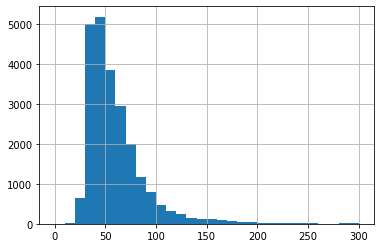

In [48]:
data['total_area'].hist(range=(0, 300), bins = 30); 
# больше всего квартир площадью до 100 кв.м, но есть квартиры и площадью почти 300 кв.м, 

In [49]:
data = data.query('total_area <= 200') 
# удалю квартиры площадью свыше 200 кв.м, так как это большая редкость, и сохраню новый результат в data

In [50]:
data.info() 
# остались квартиры только площадью до 200 кв.м

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23339 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23339 non-null  int64  
 1   last_price            23339 non-null  float64
 2   total_area            23339 non-null  float64
 3   first_day_exposition  23339 non-null  object 
 4   rooms                 23339 non-null  int64  
 5   ceiling_height        23339 non-null  float64
 6   floors_total          23339 non-null  int64  
 7   living_area           23339 non-null  float64
 8   floor                 23339 non-null  int64  
 9   is_apartment          23339 non-null  bool   
 10  studio                23339 non-null  bool   
 11  open_plan             23339 non-null  bool   
 12  kitchen_area          23339 non-null  float64
 13  balcony               23339 non-null  int64  
 14  locality_name         23339 non-null  object 
 15  airports_nearest   

# ceiling_height

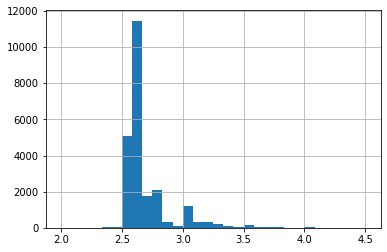

In [51]:
data['ceiling_height'].hist(range=(2, 4.5), bins = 30); 
# чаще всего квартиры имеют высоту потолков 2.5-2.7, но встречаются квартиры с потолками ниже 2.5 и выше 3.5 и даже 4 м.

In [52]:
data = data.query('2.5 <= ceiling_height <= 3.5') 
# удалю значения меньше 2.5 и больше 3.5

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23010 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23010 non-null  int64  
 1   last_price            23010 non-null  float64
 2   total_area            23010 non-null  float64
 3   first_day_exposition  23010 non-null  object 
 4   rooms                 23010 non-null  int64  
 5   ceiling_height        23010 non-null  float64
 6   floors_total          23010 non-null  int64  
 7   living_area           23010 non-null  float64
 8   floor                 23010 non-null  int64  
 9   is_apartment          23010 non-null  bool   
 10  studio                23010 non-null  bool   
 11  open_plan             23010 non-null  bool   
 12  kitchen_area          23010 non-null  float64
 13  balcony               23010 non-null  int64  
 14  locality_name         23010 non-null  object 
 15  airports_nearest   

# last_price

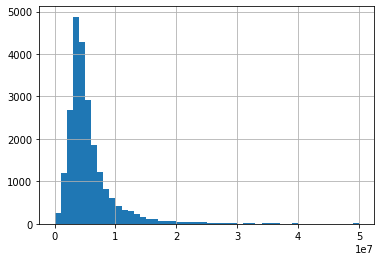

In [54]:
data['last_price'].hist(range=(2, 50000000), bins = 50); 
# большая часть квартир имеет цену в диапозоне от 3-5 млн. руб., наибольшие аномальные значения достигают 50 млн. руб. а наименьшие стремятся к стоимости ниже 500000, но это редкие варианты. 

In [55]:
data = data.query('1000000 <= last_price <= 200000000') 
# удалю значения до 1 млн и больше 20млн.

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22785 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22785 non-null  int64  
 1   last_price            22785 non-null  float64
 2   total_area            22785 non-null  float64
 3   first_day_exposition  22785 non-null  object 
 4   rooms                 22785 non-null  int64  
 5   ceiling_height        22785 non-null  float64
 6   floors_total          22785 non-null  int64  
 7   living_area           22785 non-null  float64
 8   floor                 22785 non-null  int64  
 9   is_apartment          22785 non-null  bool   
 10  studio                22785 non-null  bool   
 11  open_plan             22785 non-null  bool   
 12  kitchen_area          22785 non-null  float64
 13  balcony               22785 non-null  int64  
 14  locality_name         22785 non-null  object 
 15  airports_nearest   

# rooms

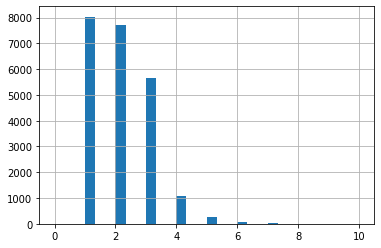

In [57]:
data['rooms'].hist(range=(0, 10), bins = 30); 
# основное количество квартир с 1-2-3 комнатные, но есть и редкие 6 и 8 комнатные квартиры

In [58]:
data = data.query('rooms < 6') 
# удалю значения свыше 4 комнат

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22707 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22707 non-null  int64  
 1   last_price            22707 non-null  float64
 2   total_area            22707 non-null  float64
 3   first_day_exposition  22707 non-null  object 
 4   rooms                 22707 non-null  int64  
 5   ceiling_height        22707 non-null  float64
 6   floors_total          22707 non-null  int64  
 7   living_area           22707 non-null  float64
 8   floor                 22707 non-null  int64  
 9   is_apartment          22707 non-null  bool   
 10  studio                22707 non-null  bool   
 11  open_plan             22707 non-null  bool   
 12  kitchen_area          22707 non-null  float64
 13  balcony               22707 non-null  int64  
 14  locality_name         22707 non-null  object 
 15  airports_nearest   

# В датафрейме остались квартиры без аномальных значений площади, цены, высоты потолков и количества комнат. Это поможет в дальнейшем исследовании данных получить более точные результаты.

### Посчитайте и добавьте в таблицу новые столбцы

# Добавим столбец с ценой за 1 кв.м

In [60]:
data['one_sqm_price'] = data['last_price'] / data['total_area'] 
# узнал цену за 1 кв.м

In [61]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_sqm_price
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,False,...,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14,30.0,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000


In [62]:
data['one_sqm_price'] = data['one_sqm_price'].round(2)
# исправлю значеия в столбце 'one_sqm_price, так как они имеют более двух знаков после запятой

In [63]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_sqm_price
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,False,...,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14,30.0,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00


# Добавим столбцы с датами

In [64]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d') 
# привел к формату datetime, был object
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday # добавил столбец с днем недели
data['month_exposition'] = data['first_day_exposition'].dt.month # добавил столбец с месяцем
data['year_exposition'] = data['first_day_exposition'].dt.year # добавил столбец с годом

In [65]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_sqm_price,weekday_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018


# Тип этажа квартиры

In [66]:
def floor_type(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    else:
        return 'не найдено'
       
data['floor_type'] = data.apply(lambda row: floor_type(row), axis=1)

print(data.head()) # добавил столбец с типом этажа

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16         51.0      8         False  ...   
1            2.65            11         18.6      1         False  ...   
2            2.65             5         34.3      4         False  ...   
3            2.65            14         30.0      9         False  ...   
4            3.03            14         32.0     13         False  ...   

   parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
0               1.0          482.0               2.0     

In [67]:
data.head()  

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_sqm_price,weekday_exposition,month_exposition,year_exposition,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой


# Расстояние до центра города в километрах, из м в км и округлим до целых значений

In [68]:
data['citycenters_nearest_km'] = data['citycenters_nearest'] / 1000
data['citycenters_nearest_km'] = data['citycenters_nearest_km'].round() 
# получил расстояние до центра в километрах и округлил до целого

In [69]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_sqm_price,weekday_exposition,month_exposition,year_exposition,floor_type,citycenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

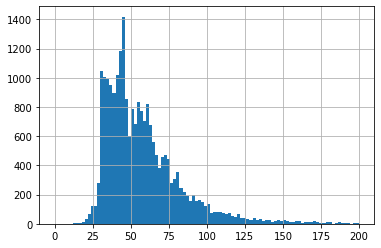

In [70]:
data['total_area'].hist(range=(0, 200), bins = 100); 
# построим гистограмму общей площади квартир

# Больше всего квартир общей площадью от 25-50 кв.м

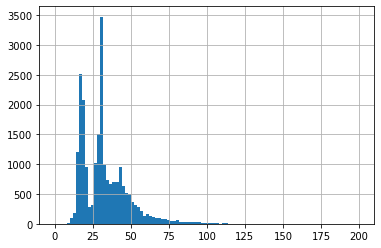

In [71]:
data['living_area'].hist(range=(0, 200), bins = 100); 
# построим гистограмму жилой площади квартир

# Жилая площадь чаще всего встречается в пределах 30 кв.м и в диапазоне от 15 до 20 кв.м, это однокомнатные квартиры и студии

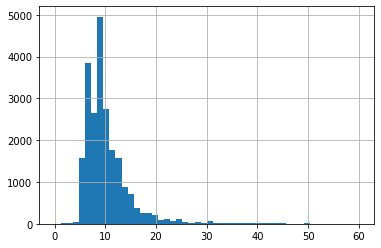

In [72]:
data['kitchen_area'].hist(range=(0, 60), bins = 50); 
# построим гистограмму площади кухни квартир

# Есть кухни выдающейся площадью 50 кв.м, но более востребованная площадь находится в диапозоне от 5-10 кв.м - всеми "любимые" хрущевки 

In [73]:
print('Минимальная стоимость квартиры:', data["last_price"].min())
print('Максимальная стоимость квартиры:', data["last_price"].max())
# для определения диапазона цены выясню мин. и макс. цену квартир (12190.0, 763000000.0), min цена возможно указана 1 кв.м

Минимальная стоимость квартиры: 1000000.0
Максимальная стоимость квартиры: 135000000.0


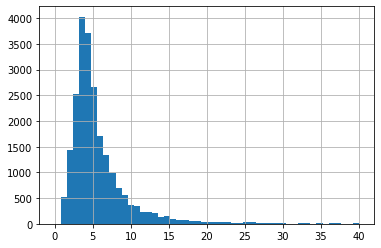

In [74]:
#data["last_price"].median() #4646000.0 медианная цена квартиры, нашел ее чтобы понимать диапазон
last_prices_norm = data['last_price'] / 1000000 # убрал миллионы для более понятного вида
last_prices_norm.hist(range=(0, 40), bins = 50); # больше всего предложений квартир в диапазоне от 3-5 млн.руб

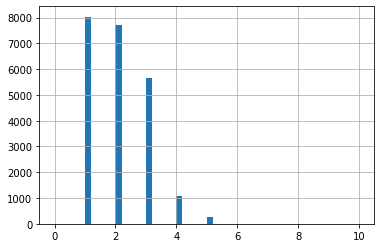

In [75]:
data['rooms'].hist(range=(0, 10), bins = 50); 
# построим гистограмму количества комнат в квартирах

# На рынке больше предлагают 1-2 комнатных квартир, чуть меньше 3-ех комнатных, остальные квартиры встречаются реже

count    22707.00
mean         2.68
std          0.17
min          2.50
25%          2.60
50%          2.65
75%          2.70
max          3.50
Name: ceiling_height, dtype: float64

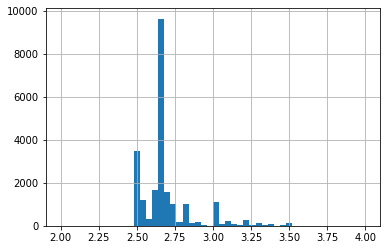

In [76]:
data['ceiling_height'].hist(range=(2, 4), bins = 50);
data['ceiling_height'].describe().round(2)

# Среднее значение высоты потолка 2,68, 75% квартир имеют высоту потолка 2,7

In [77]:
data["floor"].min(),data["floor"].max() #(1, 33)

(1, 33)

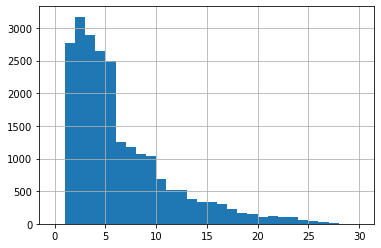

In [78]:
data['floor'].hist(range=(0, 30), bins = 30); 
# построим гистограмму этажности квартир в объявлениях

# К продаже предлагаются в основном этажи 3-6, далее 7-10, так как чаще всего это типовые серии домов построенные в период с 60-80ых годов и более старая постройка

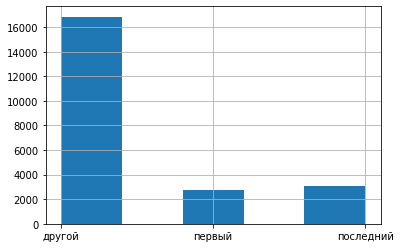

In [79]:
data['floor_type'].hist(range=(0, 2), bins = 5);
# построим гистограмму для исследования типов этажей

# Абсолютное большинство типов этажей - "Другой", крайних этажей меньше в продаже, одна из причин - магазины, которые занимают первые этажи,а последних этажей не так много, одна из причин - люди и риэлторы часто указывают этаж ниже.

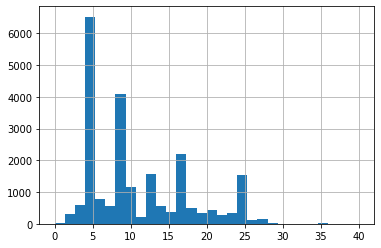

In [80]:
data['floors_total'].hist(range=(0, 40), bins = 30); 
# с помощью гистограммы исследуем частотность размещения объявлений связанных с этажностью домов

# Чаще всего продают квартиры в типовых домах, которые имеют 5 и 9 этажей

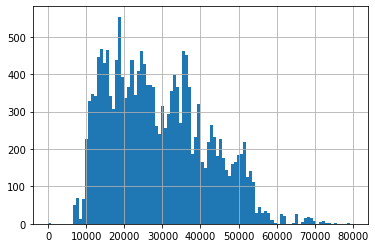

In [81]:
data['airports_nearest'].hist(range=(0, 80000), bins = 100);
# с помощью гистограммы исследуем удаленность квартир от аэропортов

# Большинство квартир на рассстоянии 10-40 км от ближайшего аэропорта

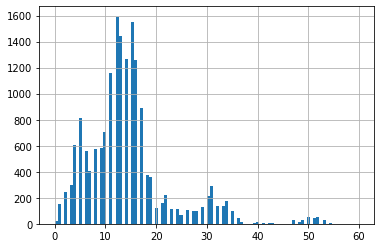

In [82]:
data['citycenters_nearest_km'].hist(range=(0, 60), bins = 100); 
# с помощью гистограммы исследуем удаленность квартир от городского центра

# Многие квартиры расположены на расстоянии от 10 до 18 км, но есть и такие, которые находятся на удалении более чем 50 км, в дадтафрейме есть и деревни и поселки 

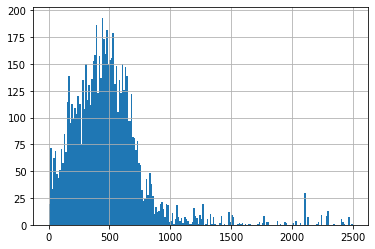

In [83]:
data['parks_nearest'].hist(range=(0, 2500), bins = 200); 
# с помощью гистограммы исследуем удаленность квартир от парков

# Многие квартиры находятся на удалении от парков на расстоянии 400-700 метров, есть и те, которые удалены на расстояние более 2 км

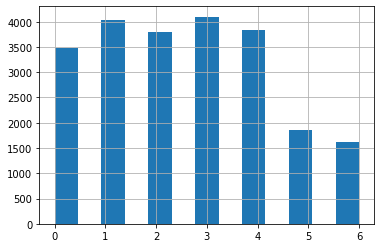

In [84]:
range_start = 0
range_end = 6
bins = 13
data['weekday_exposition'].hist(range=(range_start, range_end), bins = bins); 
# построим гистограмму для исследования размещений по дням недели

# В сб и вс меньше всего размещений, так как - выходные дни, с пн-пт самое активное время размещения объявлений

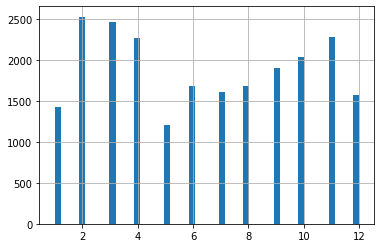

In [85]:
data['month_exposition'].hist(range=(1, 12), bins = 50); 
# построим гистограмму для анализа размещений по месяцам

# декабрь-январь - активность размещения объявлений снижена, с февраля-апрель наблюдается самый активный период, за ним следует резкое снижение активности и май-ноябрь период, когда идет планомерное восстановление количества размещаемых объявлений

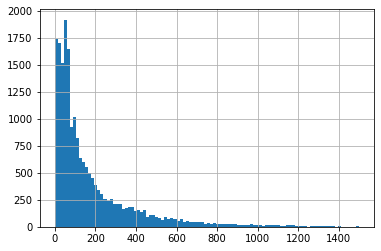

In [86]:
data['days_exposition'].hist(range=(0, 1500), bins = 100); 
# большинство квартир было в продаже от 0-100 дней, единичные квартиры продавались больше 1000 дней

In [87]:
data['days_exposition'].describe()
# медианное значение 94 дня, тоже самое видно и на графике, хотя среднее значение 180 дней, но это скорее всего из-за анамально долгих периодов продаж 

count    19729.000000
mean       179.033453
std        218.220395
min          1.000000
25%         44.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

# Быстрые продажи это до 45 дней, долгие -свыше 100 дней, аномальные значения - 1 и 1580 дней.

# Зависимость цены от общей площади

In [88]:
data['total_area'].corr(data['last_price']) 
# проверю коррелляцию общей площади и цены, коэффициент указывает на высокую зависимость, т.к. он больше 0.5

0.7160943756931212

In [89]:
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'median'])
pivot_table_total_area.columns = ['Средняя цена', 'Медианная цена']
print(pivot_table_total_area.head(10))

            Средняя цена  Медианная цена
total_area                              
12.0           2400000.0       2400000.0
13.0           2350000.0       1850000.0
13.2           1686000.0       1686000.0
14.0           1190000.0       1190000.0
15.0           1725000.0       1725000.0
15.5           2450000.0       2450000.0
16.0           2100000.0       2100000.0
17.0           1700000.0       1700000.0
17.2           2050000.0       2050000.0
17.6           3400000.0       3400000.0


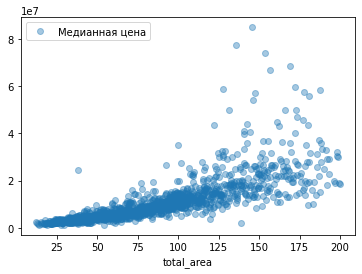

In [90]:
pivot_table_total_area.plot(y='Медианная цена', style='o', alpha=0.4);

<br> Исходя из графика можно сделать следующий вывод: чем больше квартира, тем выше ее цена.

# Зависимость цены от жилой площади

In [91]:
data['living_area'].corr(data['last_price']) 
# проверю корелляцию жилой площади и цены, коэффициент значительно ниже, чем в предыдущем анализе, но тоже больше 0.5

0.5586609774256928

In [92]:
pivot_table_living_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'median'])
pivot_table_living_area.columns = ['Средняя цена', 'Медианная цена']
print(pivot_table_living_area.head(10))

             Средняя цена  Медианная цена
living_area                              
2.0             4340000.0       4340000.0
3.0            34715000.0      34715000.0
5.0             2680000.0       2680000.0
5.4             6100000.0       6100000.0
6.0             3799000.0       3799000.0
6.5             4050000.0       4050000.0
8.0             6850000.0       6850000.0
8.3             4000000.0       4000000.0
8.4             4200000.0       4200000.0
8.5             4100000.0       4100000.0


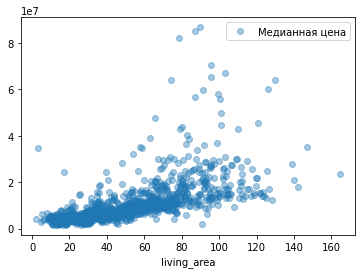

In [93]:
pivot_table_living_area.plot(y='Медианная цена', style='o', alpha=0.4);

<br> На основании графика можно сделать следующий вывод: чем больше жилая площадь квартиры, тем выше ее цена.

# Зависимость цены от площади кухни

In [94]:
data['kitchen_area'].corr(data['last_price']) 
# проверю корелляцию площади кухни и цены, значение коэффициента, как и в предыдущем анализе немного больше 0.5

0.5322300247033465

In [95]:
pivot_table_kitchen_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'median'])
pivot_table_kitchen_area.columns = ['Средняя цена', 'Медианная цена']
pivot_table_kitchen_area['Средняя цена'] = pivot_table_kitchen_area['Средняя цена'].round(2)
print(pivot_table_kitchen_area.head(10))

              Средняя цена  Медианная цена
kitchen_area                              
1.30            4250000.00       4250000.0
2.00            2821428.57       2720000.0
2.30            2940000.00       2940000.0
2.40            2200000.00       2200000.0
2.89            5967734.00       5967734.0
3.00            3063333.33       3265000.0
3.20            6000000.00       6000000.0
3.30            3900000.00       3900000.0
3.40            3700000.00       3700000.0
3.50            6387500.00       6387500.0


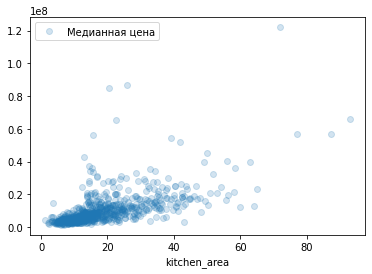

In [96]:
pivot_table_kitchen_area.plot(y='Медианная цена', style='o', alpha=0.2);

<br> На основании графика сложно сказать, что есть прямая зависимость цены от площади кухни.

# Зависимость цены от количества комнат

In [97]:
data['rooms'].corr(data['last_price'])
# проверю корелляцию количества комнат и цены, значение коэффициента ниже 0.5, 
# а это означает, что другте факторы могут влиять сильнее, например удаленность от центра.

0.411983116410292

In [98]:
pivot_table_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc = ['mean', 'median'])
pivot_table_rooms.columns = ['Средняя цена', 'Медианная цена']
pivot_table_rooms['Средняя цена'] = pivot_table_rooms['Средняя цена'].round(2)
print(pivot_table_rooms.head())

       Средняя цена  Медианная цена
rooms                              
1        3838586.44       3600000.0
2        5565624.14       4800000.0
3        7960090.48       6177643.0
4       11619068.89       8800000.0
5       14899440.24      12500000.0


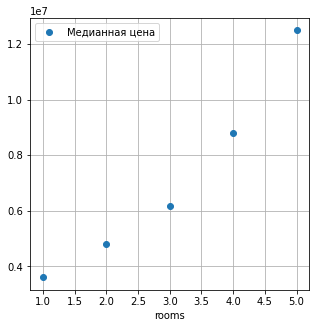

In [99]:
pivot_table_rooms.plot(y='Медианная цена', grid=True, style='o', figsize=(5, 5));

# Зависимость цены от этажа

In [100]:
data['floor'].corr(data['last_price']) 
# зависимость цены от этажа срвсем отсутстует, но на грфику мы видим аномальные значения, которые могут говорить о том, что пентхацсы стоят дороже, а первые этажи дешевле

0.054700843097020335

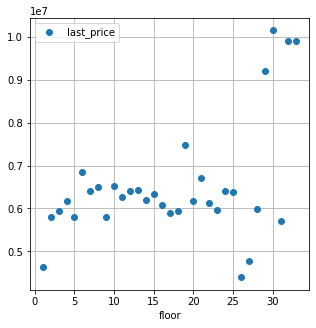

In [101]:
data.pivot_table(index='floor', values='last_price').plot(grid=True, style='o', figsize=(5, 5));

# Зависимость цены от дня размещения

In [102]:
depend_day_price = data.pivot_table(index='weekday_exposition', values='last_price', aggfunc = ['mean', 'median'])
depend_day_price.columns = ['Средняя цена', 'Медианная цена']
depend_day_price['Средняя цена'] = depend_day_price['Средняя цена'].round(2)
print(depend_day_price.head(7))

                    Средняя цена  Медианная цена
weekday_exposition                              
0                     5962788.82       4600000.0
1                     5958386.41       4700000.0
2                     5908717.31       4650000.0
3                     6151224.29       4600000.0
4                     5806827.00       4550000.0
5                     5936851.84       4567500.0
6                     5712332.46       4500000.0


<br> На основании данных видно, что разброс цен по дням недели небольшой, менее 5%, поэтому день недели никак не влияет на цену

# Зависимость цены от месяца размещения

In [103]:
depend_month_price = data.pivot_table(index='month_exposition', values='last_price', aggfunc = ['mean', 'median'])
depend_month_price.columns = ['Средняя цена', 'Медианная цена']
depend_month_price['Средняя цена'] = depend_month_price['Средняя цена'].round(2)
print(depend_month_price.head(7))

                  Средняя цена  Медианная цена
month_exposition                              
1                   5964863.58       4600000.0
2                   6022835.41       4615000.0
3                   5763262.93       4600000.0
4                   5943959.93       4780000.0
5                   5901580.93       4500000.0
6                   5786752.73       4400000.0
7                   5853811.68       4600000.0


<br> На основании данных видно, что разброс цен по месяцам небольшой, менее 5%, поэтому день недели никак не влияет на цену.

# Зависимость цены от года размещения

In [104]:
depend_year_price = data.pivot_table(index='year_exposition', values='last_price', aggfunc = ['mean', 'median'])
depend_year_price.columns = ['Средняя цена', 'Медианная цена']
depend_year_price['Средняя цена'] = depend_year_price['Средняя цена'].round(2)
print(depend_year_price.head(6))

                 Средняя цена  Медианная цена
year_exposition                              
2014              10909764.09       7500000.0
2015               7246267.33       5200000.0
2016               6096106.12       4500000.0
2017               5812005.31       4500000.0
2018               5634628.21       4550000.0
2019               6301817.82       5000000.0


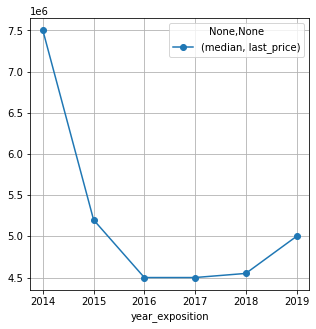

In [105]:
data.pivot_table(index='year_exposition', values='last_price', aggfunc = ['median']).plot(grid=True, style='o-', figsize=(5, 5));

<br> График показывает, что цена на квартиры падала с 2014 года, а с 2017 цены на квартиры начинают расти и с 2018 рост ускоряется, но цены далеки от цен 2014 года.

# Больше всего линейная зависимость прослеживается в следующих случаях: 
## общая стоимость(last_price) - общая площадь(total_area) 
## общая стоимость(last_price) - жилая площадь(living_area)
## общая стоимость(last_price) - года размещения(year_exposition)

# Топ 10 городов по количеству объявлений

In [106]:
locality_name_top_10 = data['locality_name'].value_counts().sort_values(ascending=False).head(10)
print(locality_name_top_10) 
# В СПб больше всего количество объявлений, в Выборге меньше всего.

Санкт-Петербург           15109
поселок поселок Мурино      550
поселок Шушары              438
Всеволожск                  394
Пушкин                      355
Колпино                     336
поселок Парголово           325
Гатчина                     304
деревня Кудрово             299
Выборг                      226
Name: locality_name, dtype: int64


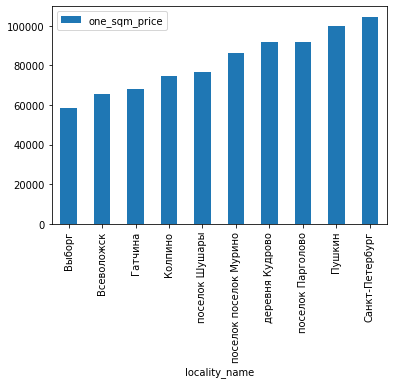

In [107]:
data.query('locality_name in @locality_name_top_10.index').pivot_table(index='locality_name', values='one_sqm_price', aggfunc='median').sort_values('one_sqm_price').plot(kind='bar'); 
# Дороже всего 1 кв.м в СПб, а дешевле всего в Выборге.

# Зависимость стоимости объектов от расстояния до центра города

In [108]:
data['one_km_price'] = data['one_sqm_price'] / data ['citycenters_nearest_km']
data['one_km_price'] = data['one_km_price'].round(2)
display(data.head())
# добавил столбец стоимости км в каждом городе

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,one_sqm_price,weekday_exposition,month_exposition,year_exposition,floor_type,citycenters_nearest_km,one_km_price
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0,7523.15
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0,4364.25
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0,6627.55
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0,58310.87
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0,12500.00


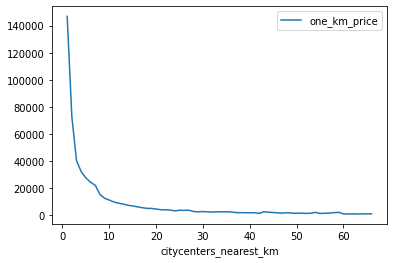

In [109]:
data.pivot_table(index='citycenters_nearest_km', values='one_km_price').plot();

# Чем ближе к центру, тем цена дороже 

### Общий вывод

Анализ данных проекта показал, что есть пропуски в значениях и неявные дубликаты, которые были устранены и исправлены. В некоторых столбцах был заменен тип данных. 

В данные были добавлены новые столбцы: цена одного квадратного метра, день недели, месяц и год публикации объявления, тип этажа квартиры, расстояние до центра города в километрах.

Были подробно изучены параметры объектов: площадь, этаж, количество комнат и т.д. Проверена информация насколько быстро продавались квартиры.

Изучены факторы, которые влияют на стоимость квартиры и на графиках показана зависимость.

В ходе проведенного исследования было установлено следующее: больше всего объявлений в СПб, самые популярные квартиры от 3-5 млн. руб., площадью 25-50 кв.м, возможно если делать срез только для СПб, то данные изменятся. Предполагаю, что в СПб, как и в любом крупном городе, чем ближе квартира расположена к центру города, тем дороже она стоит. Кроме того, на общую стоимость квартиры влияет ее общая площадь и жилая площадь. 

И один из главных факторов, от которого зависит цена квартиры - это год, так как на нее может повлиять кризис, стагнация и рост экономики страны, либо микрофакторы, неблагоприятный район или поселок, который перестает существовать.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод